<a href="https://colab.research.google.com/github/ellaclauz/Airbnb-NYC-2019/blob/main/Airbnb_NYC_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [18]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [19]:
!ls

gdrive	sample_data


In [28]:
from google.colab import files
uploaded = files.upload()

Saving Airbnb_NYC_2019.csv to Airbnb_NYC_2019.csv


In [31]:
listings = pd.read_csv ("Airbnb_NYC_2019.csv")

In [32]:
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [33]:
listings['neighbourhood_group'].apply(lambda neighbourhood_group: "Manhattan" in neighbourhood_group).sum()

21661

In [34]:
# Neighbourhood group in Manhattan
Manhattan = listings.loc[("Manhattan" in neighbourhood_group for neighbourhood_group in listings["neighbourhood_group"]), :]
Manhattan

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48886,36483010,Comfy 1 Bedroom in Midtown East,274311461,Scott,Manhattan,Midtown,40.75561,-73.96723,Entire home/apt,200,6,0,NaN,NaN,1,176
48888,36484087,"Spacious Room w/ Private Rooftop, Central loca...",274321313,Kat,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,125,4,0,NaN,NaN,1,31
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [35]:
Manhattan.shape

(21661, 16)

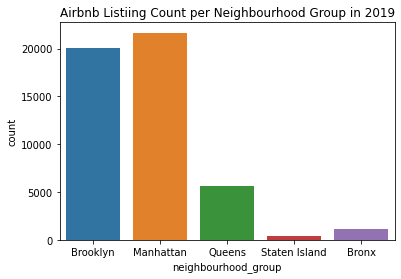

In [48]:
#visualising the Airbnb listings in each neighbourhood group of Newyork from the listings dataframe
sn.countplot(x= "neighbourhood_group", data= listings)
plt.title("Airbnb Listiing Count per Neighbourhood Group in 2019")
plt.show()

This visualisation shows that there are five Neighbourhood Group, with Manhattan having the highest count of  Airbnb listing and Staten Island having the least count of Airbnb listing in Newyork from the Listing dataframe. 

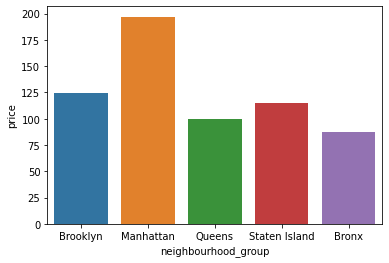

In [50]:
#Barchart showing the average price of Airbnb listing in each Neighbourhood Group of Newyork city 

sn.barplot( x= "neighbourhood_group", y= "price", data=listings, ci = False)
plt.show()

From this it appears that Manhatten is the Neighbourhood Group with the highest average price for Airbnb listings in 2019.

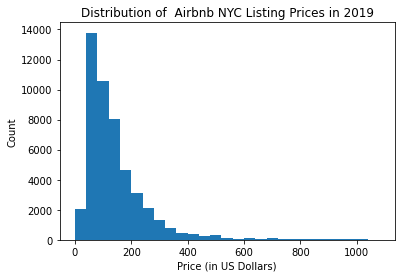

In [53]:
# Visualizing the distribution of the prices from this dataset
plt.hist(listings["price"], bins = np.arange(0, 1100, 40))
plt.title("Distribution of  Airbnb NYC Listing Prices in 2019")
plt.xlabel("Price (in US Dollars)")
plt.ylabel("Count")
plt.show()

It appears that NYC in 2019 a lot of the prices in Airbnb listing lies between 15-500 USD based on this visualization

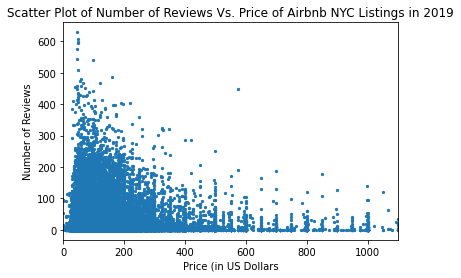

In [57]:
#Creating a scatterplot to compare the number of reviews to the prices
plt.scatter(x= listings["price"], y= listings["number_of_reviews"], s = 5)  
plt.xlim(0, 1100)
plt.title("Scatter Plot of Number of Reviews Vs. Price of Airbnb NYC Listings in 2019")
plt.xlabel("Price (in US Dollars")
plt.ylabel("Number of Reviews")
plt.show()

From this plot, it appears that listings with lower prices has the highest number of reviews.

In [36]:
# how many columns in the neighbourhood group is Manhattan
Manhattan.shape[1] 

16

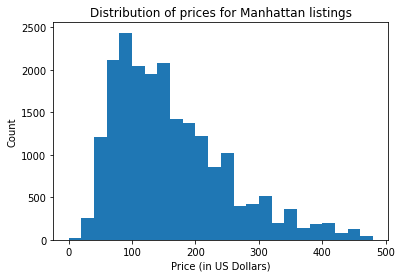

In [37]:
# Create a histogram to visualize the distribution of prices for the Manhattan listings

plt.hist(Manhattan["price"], bins = np.arange(0, 500, 20))
plt.title("Distribution of prices for Manhattan listings")
plt.xlabel("Price (in US Dollars)")
plt.ylabel("Count")
plt.show()

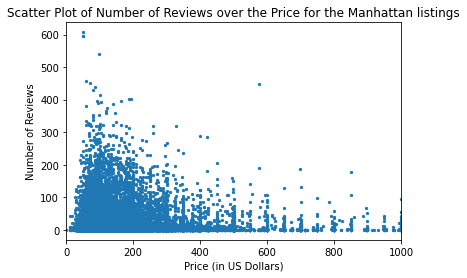

In [38]:
# Create a scatter plot to visualize the number of reviews over the price for the Manhattan listings.

plt.scatter(x= Manhattan["price"], y= Manhattan["number_of_reviews"], s = 5)
plt.xlim(0, 1000)
plt.title("Scatter Plot of Number of Reviews over the Price for the Manhattan listings")
plt.xlabel("Price (in US Dollars)")
plt.ylabel("Number of Reviews")
plt.show()

In [39]:
# Identify the Top 10 Neighbourhoods in Manhattan listings
top_manhattan_listing = Manhattan.neighbourhood.value_counts().head(10)
top_manhattan_listing

Harlem                2658
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Midtown               1545
East Harlem           1117
Chelsea               1113
Lower East Side        911
Washington Heights     899
Name: neighbourhood, dtype: int64

In [40]:
# grabbing Top 10 Neighbourhood for sub-dataframe
Subset_Manhattan_Top10 = Manhattan.loc[Manhattan['neighbourhood'].isin(['Harlem', 'Upper West Side', 'Hell\'s Kitchen', 'East Village', 'Upper East Side', 'Midtown', 'East Harlem', 'Chelsea', 'Lower East Side', 'Washington Heights'])]
Subset_Manhattan_Top10

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48886,36483010,Comfy 1 Bedroom in Midtown East,274311461,Scott,Manhattan,Midtown,40.75561,-73.96723,Entire home/apt,200,6,0,NaN,NaN,1,176
48888,36484087,"Spacious Room w/ Private Rooftop, Central loca...",274321313,Kat,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,125,4,0,NaN,NaN,1,31
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [41]:
Subset_Manhattan_Top10.shape

(15823, 16)

In [42]:
# How many rows are in the Subset
Subset_Manhattan_Top10.shape[0]

15823

In [43]:
# How many columns are in the subset
Subset_Manhattan_Top10.shape[1]

16

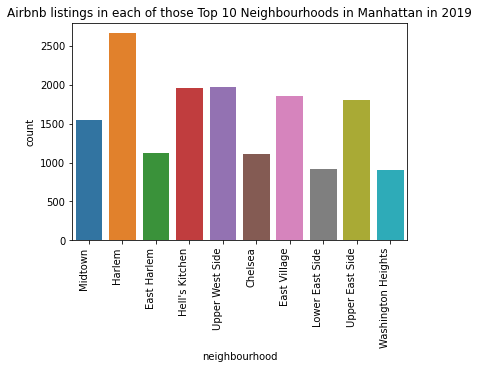

In [44]:
# Countplot visualization of Airbnb listings in each of the top 10 neighbourhoods in Manhattan in 2019

sn.countplot(x= "neighbourhood", data= Subset_Manhattan_Top10)
plt.title("Airbnb listings in each of those Top 10 Neighbourhoods in Manhattan in 2019")
plt.xticks(rotation=90, horizontalalignment= 'right')
plt.show()